<a href="https://colab.research.google.com/github/anactedesco/acoes_bolsa/blob/main/candlesticks_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Criando Gráficos de Candlestick com Matplotlib
![Candlestick Chart](https://i.imgur.com/84LtMlN.png)


![Candlestick](https://www.bussoladoinvestidor.com.br/wp-content/uploads/2019/12/upload_cms_candlestick_Candlestick1.png)

Fonte: https://www.bussoladoinvestidor.com.br/grafico-de-candlestick/

## 1. Importando as bibliotecas e fazendo algumas manipulações inicias

In [1]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
#Utilizando a API do yahoofinance, que contem dados de ações de bolsas abertas
dados = yf.download('VALE3.SA', start='2023-03-28', end='2024-03-28')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-28,78.720001,79.900002,78.589996,79.370003,73.021866,13866800
2023-03-29,79.989998,80.839996,79.839996,80.510002,74.070686,17345200
2023-03-30,81.699997,81.949997,81.150002,81.820000,75.275894,14249000
2023-03-31,81.599998,82.169998,79.910004,80.290001,73.868271,22468400
2023-04-03,79.800003,80.389999,79.410004,80.309998,73.886681,13510200
...,...,...,...,...,...,...
2024-03-21,62.430000,62.630001,61.590000,61.660000,61.660000,18445500
2024-03-22,61.500000,61.560001,60.930000,60.950001,60.950001,11058400
2024-03-25,61.020000,61.320000,60.650002,60.820000,60.820000,10478200


In [6]:
#Renomeando o nome das colunas para português
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']

In [7]:
#Renomeando o eixo
dados = dados.rename_axis('Data')
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2023-03-28,78.720001,79.900002,78.589996,79.370003,73.021866,13866800
2023-03-29,79.989998,80.839996,79.839996,80.510002,74.070686,17345200
2023-03-30,81.699997,81.949997,81.150002,81.820000,75.275894,14249000
2023-03-31,81.599998,82.169998,79.910004,80.290001,73.868271,22468400
2023-04-03,79.800003,80.389999,79.410004,80.309998,73.886681,13510200
...,...,...,...,...,...,...
2024-03-21,62.430000,62.630001,61.590000,61.660000,61.660000,18445500
2024-03-22,61.500000,61.560001,60.930000,60.950001,60.950001,11058400
2024-03-25,61.020000,61.320000,60.650002,60.820000,60.820000,10478200


### 2. Fazendo plots de ações da VALE na mão

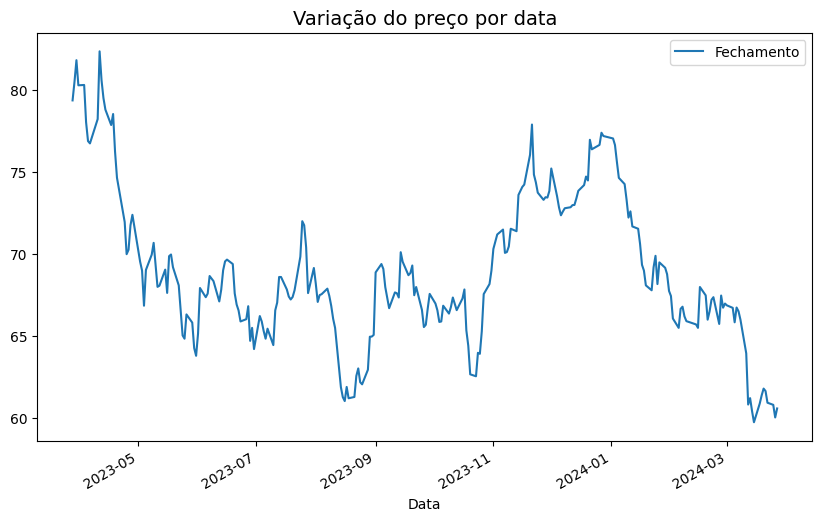

In [11]:
#Plotando um gráfico simples de fechamento das ações
dados['Fechamento'].plot(figsize=(10,6)) #definindo o tamanho da plotagem do gráfico
plt.title('Variação do preço por data', fontsize=14) #começando a usar a biblioteca plt e defindo o tamanho da fonte do título
plt.legend(['Fechamento']) #definindo a legenda do gráfico, chamando pelo nome da coluna no df

In [17]:
df = dados.tail(90).copy() #selecionando as observações dos últimos 60 dias

#convertendo o índice em uma coluna de data
df['Data'] = df.index

#convertendo as datas para o formato numérico de matplotlib
#isso é necessário para que o matplotlib possa plotar as datas corretamente no gráfico
df['Data'] = df['Data'].apply(mdates.date2num) #usamos 'apply' para empregar uma função dentro de uma outra função. nesse caso, para transformar 'data' em número/numérica

df

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume,Data
Data,,,,,,,
2023-11-16,73.099998,74.339996,73.010002,74.099998,70.230064,31235400,19677.0
2023-11-17,74.230003,74.650002,74.099998,74.239998,70.362755,24538600,19678.0
2023-11-20,75.800003,76.650002,75.430000,76.059998,72.087700,28810100,19681.0
2023-11-21,77.290001,78.550003,76.849998,77.900002,73.831604,45317800,19682.0
2023-11-22,75.849998,76.070000,74.209999,74.849998,71.645180,33715300,19683.0
...,...,...,...,...,...,...,...
2024-03-21,62.430000,62.630001,61.590000,61.660000,61.660000,18445500,19803.0
2024-03-22,61.500000,61.560001,60.930000,60.950001,60.950001,11058400,19804.0
2024-03-25,61.020000,61.320000,60.650002,60.820000,60.820000,10478200,19807.0


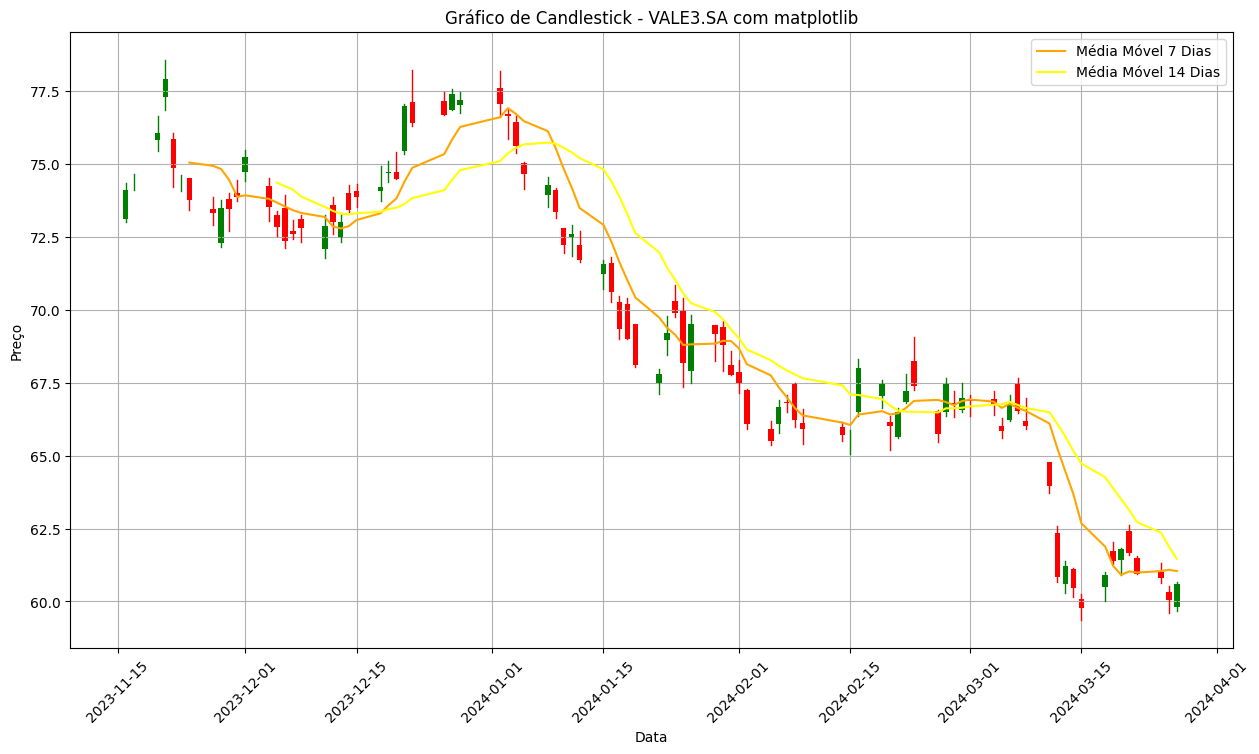

In [18]:
fig, ax = plt.subplots(figsize=(15, 8))

#definir a largura dos candles no gráfico
width = 0.7

#estrutura de repetição
for i in range(len(df)):
    #determinando a cor do candle
    #se o preço de fechamento for maior que o de abertura, o candle é verde (a ação valorizou nesse dia)
    #se for menor, o candle é vermelho (a ação desvalorizou)
    if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    #desenhando a linha vertical do candle (mecha)
    #essa linha mostra os preços máximo (topo da linha) e mínimo (base da linha) do dia
    #desenhando uma linha vertical usando 'ax.plot'
    #[df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x da linha (a data), e [df['Mínimo'].iloc[i], df['Máximo'].iloc[i]] define a altura da linha.
    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                               width,
                               abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                               facecolor=color))

df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

#plotando as médias móveis
ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')  #média de 7 dias
ax.plot(df['Data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')  #média de 14 dias
#adicionando legendas para as médias móveis
ax.legend()

#formatando o eixo x para mostrar as datas
#configurando o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #o método xaxis_date() é usado para dizer ao matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

#adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Candlestick - VALE3.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

#adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

#exibindo o gráfico
plt.show()

In [19]:
#criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação, mostrando o preço de abertura,
fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
#adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

#adicionando as médias móveis
#adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

#adicionando o gráfico de barras para o volume
#em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

#atualizando layout
#finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  #desativa o range slider
                  width=1100, height=600)

#mostrando o gráfico
fig.show()

### 3. Poupando muitas linhas de código e plotando os gráficos direto da API

In [36]:
dados = yf.download('AAPL', start='2023-03-28', end='2024-03-28')

[*********************100%%**********************]  1 of 1 completed


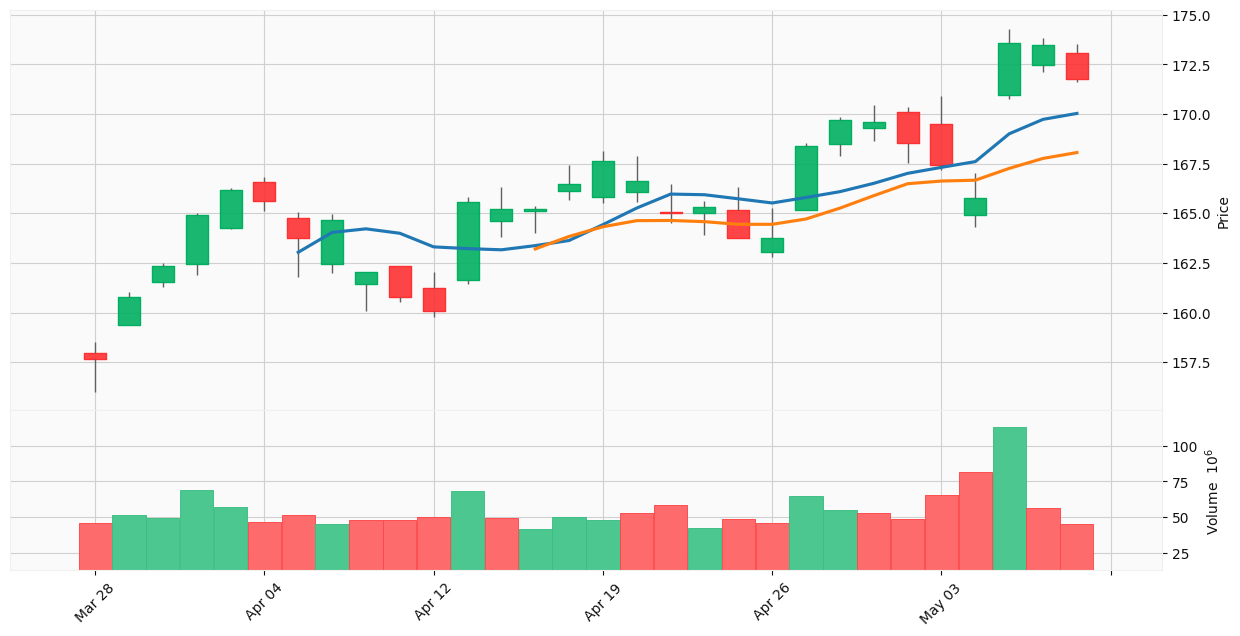

In [37]:
mpf.plot(dados.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14), style = 'yahoo')